# Advanced worksheet: Solving systems of Ordinary Differential Equations<a id="ODE"></a>

Many physical problems are described by Ordinary Differential Equations (ODE). This advanced worksheet is going to take you through a number of different scenarios in which you need to solve ODEs. Note that this worksheet increases in difficulty per section as well as the level of independent learning required. 

In our simplest example, we will look at the decay rate of a radioactive substance. This radioactive decay of a sample of $N$ atoms can be described as:

$$\frac{dN}{dt} = -\alpha N.$$

Here $\alpha$ is the constant of proportionality. We already know how solve this particular differential equation analytically (in fact we used the solution already in Session 1); we will now demonstrate how to solve it numerically.

The simplest Scipy ODE solver (and which we recommend that you use) is <span style="color:blue">odeint()</span> which is part of the <span style="color:blue">scipy.integrate</span> package.

In order to use the ODE integrator you will have to define a function whose calling arguments are the variable to be differentiated and the variable with respect to which it will be differentiated. You will also need to specify the initial condition.

The code below contains an example, which uses <span style="color:blue">odeint()</span> to calculate the value of $N$ as a function of time $t$ and subsequently plots the result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

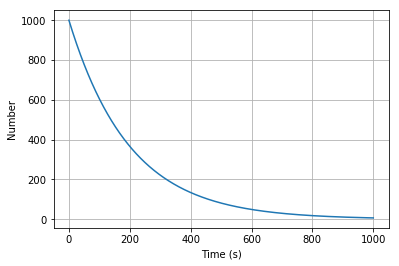

In [2]:
import scipy.integrate as spi

alpha = 0.0050228 #define constant of proportionality

# This function takes the variable to be differentiated, i.e. N as a function of t
def dif_func(N,t):
    dN_dt = -alpha*N # specify the derivative of N as a function of t (i.e. the differential equation)
    return dN_dt # returns differentiated values of N

# Create an array of time steps (1000 days in this instance)
t = np.linspace(0.,1000.,10000) # solving every tenth of a second.

# set initial condition
N = 1000 # Starting with 1000 molecules
# Solve the differential equation
soln=spi.odeint(dif_func,N,t) # input arguments: function name, initial condition and timesteps

# Note: the variable soln now contains an array with the value of N at each time step t
# We can now plot N versus t

plt.grid()
plt.plot(t,soln)
plt.xlabel("Time (s)")
plt.ylabel("Number")

plt.show()


**Exercise: run the example code and compare the result with what you would expect. Extend the code to find the half life of this radioactive sample. Which radioactive element was used for this example?**

## Higher-order ODEs: Newton's second law
In Physics, we often need to solve higher (at least second) order ODE, which can be hard to do analytically. Fortunately, higher order ODE can always be written down as a set of first order ODE. For example, through Newton’s second law, the position of an object is related to the force that it experiences by a second order ODE, however it can be written as a set of two first order ODE. I.e. for a force \(F(x)\) on a body of mass \(m\) we have

$$m\frac{d^2x}{dt^2} = F(x),$$

but this can be rewritten as the set of first order ODE:

$$\frac{dv}{dt}=F(x)/m,\quad\frac{dx}{dt}= v.$$

Let us consider the example of a particle moving in one dimension under gravity at the earth’s surface, with an initial velocity of $+10\rm\,ms^{-1}$ (which we define to be upwards so that gravity is in the negative direction). In this case our differential equations become:

$$\frac{dv}{dt}=-g,\quad\frac{dx}{dt}= v.$$

We can simulate this using the following code. Note that now we need to pass two variables to be differentiated ($x$ and $v$, both with respect to $t$) to our function. Pay close attention to how this works.


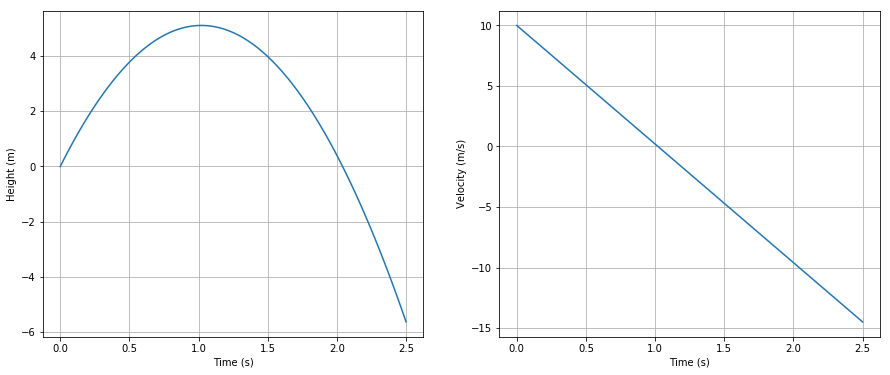

In [3]:
g = 9.8 #define magnitude of local gravity

# x and v are stored in an array called variables, and passed to the function, along with the time array t.
def dif_func(variables,t):
    x = variables[0] # x is in the first element of the array (as defined by the order of our initial guess below)
    v = variables[1] # v is in the second element of the array 
    a = -g # calculate the derivative of v (don't forget the acceleration is in the negative direction).
    return [v,a] # return an array containing the differentiated values of x and v i.e. [dx/dt, dv/dt]

# Create an array with time steps (2.5 seconds in this case)
t = np.linspace(0.,2.5,100) # 100 time steps

# set initial conditions going up at 10 ms^-1 starting at ground level
variables0=[0.,10]

# solve the ODEs
soln=spi.odeint(dif_func,variables0,t) # input arguments: function name, initial conditions and timesteps

xsol = soln[:,0] # the calculated values of x as a function of t are in the first column of the returned array
vsol = soln[:,1] # the calculated values of v as a function of t are in the second column of the returned array

plt.rcParams.update({'figure.figsize': [15, 6]} )# Create a large figure to accommodate 2 sub plots

# Plot height as a function of time 
plt.subplot(1,2,1)
plt.grid()
plt.plot(t,xsol)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")

# Plot velocity as a function of time 
plt.subplot(1,2,2)
plt.grid()
plt.plot(t,vsol)
plt.xlabel("Time (s)")
plt.ylabel("Velocity (m/s)")

plt.show()

Make sure you understand how the code above works. Note how the algorithm does not take into account whether the solution makes any physical sense - for example the particle reaches the ground ($x=0$) just after 2 seconds, but the solutions for $x$ and $v$ are calculated up until 2.5 s regardless. 
<p>
    
**Exercise: can you amend the code above to take into account what happens when the particle hits the ground (assuming a completely inelastic collision, where the particle loses all its energy instantaneously)? Hint: work with the array containing the solutions after the ODEs have been solved, instead of editing the function containing the differential equations.**

Of course the example above can be solved analytically as well with the $suvat$ equations. 

**Exercise: calculate the analytical solution - how does it compare with the numerical solution? Plot the error of the numerical solution (i.e. the analytical solution minus the numerical solution) as a function of time.**

In the example above we have neglected air resistance. We are now going to make our scenario more realistic by adding in air resistance, where the force due to air resistance $F_{\rm air}$ is proportional to the square of the velocity $v$ of the object:

$$ F_{\rm air}(v) = -\frac{1}{2}\rho A C v^2.$$

Here $\rho$ is the density of air, $A$ is the cross section of the object (i.e. $\pi r^2$ for a sphere) and $C$ is the drag coefficient (typically 0.47 for a spherical object).

**Exercise: model the motion of a tennis ball thrown straight up into the air in a similar manner to the example above, but including air resistance. Compare the cases with and without air resistance by plotting them in the same graph. Hint: start by writing out the new equation of motion and finding $dv/dt$. Think carefully about the sign of the drag force!**

Now it is time to write some ODE solving code yourself, in a slightly different scenario.

**Exercise: model the motion of a tennis ball dropped from the Tower of Pisa. What is the terminal velocity of the ball (i.e. the maximum velocity the ball can reach)? What would be the result of the exact same experiment if the Tower of Pisa was located on Venus?** 

You can use your model to investigate a wide range of different questions. For example, can you derive how the terminal velocity depends on the mass of the ball? Hint: be careful what mass range you choose to investigate. Why is this important?

Feel free to explore other questions and discuss your results to a demonstrator!

## Harmonic Oscillators

If you are interested in numerical modelling and would like to spend more time on it, try the scenarios below. Each box takes the model a step further and hence becomes more challenging - you can decide for yourself how far you want to take it. 

### Simple harmonic motion

Consider a mass attached to a spring lying on a frictionless surface as shown in the figure. 

![spring](https://cclewley.github.io/ComputingYr1/Images4/spring.jpg)

According to Hooke's law, the restoring force on the mass is directly proportional to the extension of the spring so :

$$
m\frac{d^2x}{dt^2}=-kx
$$

Where $k$ is the spring constant for that spring.

This can be rewritten as 

$$
\frac{d^2x}{dt^2} = - \omega_0^2 x
$$

where $\omega_0= \sqrt{k/m}.$

**Exercise: write this second order differentional equation as a series of first order differential equations and create a simulation of a similar system with a spring constant $k=18\,\rm Nm^{-1}$ and a mass of 0.5 kg. Plot both the position and the velocity of the mass if intitally you extend the spring by 10 cm. Run your simulation for 10 s. You should think about what is happening to the energy in this system.**

### Damped harmonic motion

In the next step, we replace the frictionless surface with different surfaces with different amounts of friction. However in each case the friction is proportional to the velocity (i.e. $F=-bv$) so the equation of motion becomes:

$$
m\frac{d^2x}{dt^2} +b\frac{dx}{dt} +k x=0
$$

where b is a constant for the particular surface.
This is often written as:

$$
\frac{d^2x}{dt^2} +\gamma\frac{dx}{dt}+  \omega_0^2 x =0
$$

Here $\gamma = b/m$. 

**Exercise: modify your simulations to include this damping. Investigate how the motion changes with different values of $b$. Specifically, try values of $b$ that are less than $6$, $b=6$ and values for $b$ that are much greater than $6$. You should try to describe what you see and decide whether or not the motion is oscillatory or not. Again, think about what is happening to the energy in this system.**

### Forced oscillators

Taking it another step forward, we can imagine that instead of being attached to a fixed wall the spring is attached to a moving oscillator that is oscillating with an amplitude of 5 cm and a frequency $\Omega$, exerting a driving force on the spring system. The driving force is $F_{\rm dr} = kA\cos{(\Omega t)}$, where $A$ is the amplitude of the oscillation. 

**Exercise: adapt your previous code to include the driving force. Start with with you mass at rest at the unextended length of the spring. Investigate the motion of the mass for different values of $\Omega$. You might want to especially consider both the situation where the damping is light (i.e. $b$ is quite small) and where damping is very heavy (i.e. $b$ is very large). You should run you simulation for more than 10s (perhaps 100s is better here but do investigate how the mass goes from stationary to its final motion). Take care to look at the amplitude of the motion.**


### Coupled oscillators

Finally, consider a situation where you have two equal masses connected to two fixed surfaces by springs with a constant $k_1=18\rm\,N\,m^{-1}$. However they are also coupled to each other by a spring of constant $k_2$, as shown below.

![coupled_spring](https://cclewley.github.io/ComputingYr1/Images4/coupled_springs.png)

If the surface is now frictionless (again) their equations of motion become:

$$
m\frac{d^2x_1}{dt^2}=-x_1 k_1+(x_2-x_1)k_2 \\
m\frac{d^2x_2}{dt^2}=-x_2 k_1+(x_1-x_2)k_2 
$$

**Exercise: rearrange the equations above into a set of four first differential equations. Write a simulation of this situation. We suggest that you start with $k_2$ being a lot smaller than $k_1$. Start the simulation with just one of the masses displaced from its equilibrium situation by 10 cm and everything else at rest. What is happening to the energy here?**